In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 183.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 141.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 129.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 201.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 132.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 120.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 180.0 MB/s eta 0:00:00


# Analysis of clusters in sample S3

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

## Preprocessing
### Read data

In [3]:
data_path = "../../data/BacDrop"
data_gene = sc.read_h5ad(data_path + "/untreated_data_processed.h5ad")
data_gene

AnnData object with n_obs × n_vars = 48511 × 2500
    obs: 'treatment', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'outlier', 'n_genes', 'total_counts_norm', 'total_counts_scale', 'leiden_opt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'var_counts', 'is_scd_outlier', 'nb_overdisp', 'nb_overdisp_cutoff', 'nb_mean', 'nb_umi', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'lt', 'locus_tag', 'product_accession', 'name', 'symbol'
    uns: 'BacSC_params', 'hvg', 'leiden_opt', 'leiden_opt_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'vst_counts'
    obsp: 'connectivities', 'distances'

In [5]:
data_gene_01 = data_gene[data_gene.obs["leiden_opt"].isin(("0", "1"))]
sc.pp.filter_genes(data_gene_01, min_cells=2)
data_gene_01

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:275: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


AnnData object with n_obs × n_vars = 46533 × 2407
    obs: 'treatment', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'outlier', 'n_genes', 'total_counts_norm', 'total_counts_scale', 'leiden_opt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'var_counts', 'is_scd_outlier', 'nb_overdisp', 'nb_overdisp_cutoff', 'nb_mean', 'nb_umi', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'lt', 'locus_tag', 'product_accession', 'name', 'symbol'
    uns: 'BacSC_params', 'hvg', 'leiden_opt', 'leiden_opt_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'vst_counts'
    obsp: 'connectivities', 'distances'

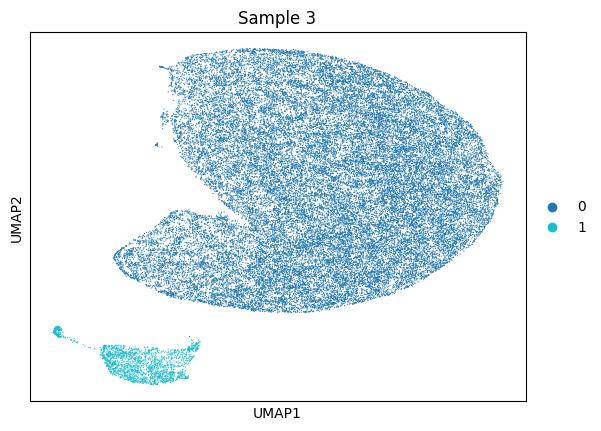

In [9]:
sc.pl.umap(data_gene_01, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [22]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene_01, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB a

gene 1100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1200
Both 

In [23]:
data_gene_01.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,product_accession,name,symbol,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-AF52_RS00165,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000074,...,NaN,diguanylate cyclase,NaN,0.000043,0.000043,1.847302e-09,poi,0.000562,inf,0.919103
cds-AF52_RS00275,27,0.000577,0.000577,99.944343,28.0,3.367296,24,0.000618,False,0.013178,...,WP_228690243.1,integrase arm-type DNA-binding domain-containi...,NaN,0.000537,0.000580,-4.269161e-05,nb,0.000544,0.040484,0.000000
cds-AF52_RS00620,44,0.000928,0.000927,99.909299,45.0,3.828641,43,0.000967,False,0.025466,...,NaN,sugar ABC transporter ATP-binding protein,NaN,0.000946,0.000988,-4.208616e-05,nb,0.000945,0.023207,0.000000
cds-AF52_RS01015,4,0.000082,0.000082,99.991754,4.0,1.609438,4,0.000082,False,0.000115,...,NaN,biotin/lipoyl-binding protein,NaN,0.000086,0.000086,7.389208e-09,poi,0.000914,inf,0.900522
cds-AF52_RS01025,5,0.000103,0.000103,99.989693,5.0,1.791759,4,0.000103,False,0.000158,...,NaN,cysteine peptidase family C39 domain-containin...,NaN,0.000086,0.000086,7.389208e-09,poi,0.000914,inf,0.900522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-WP_187079189.1,95,0.001979,0.001977,99.804168,96.0,4.574711,94,0.002017,False,0.057481,...,WP_187079189.1,ribonuclease D,rnd,0.002042,0.002080,-3.881228e-05,nb,0.002038,0.010732,0.000000
cds-WP_187079192.1,735,0.015378,0.015261,98.484880,746.0,6.616065,21,0.015597,False,0.700161,...,WP_187079192.1,IS5-like element IS903B family transposase,NaN,0.000451,0.000451,2.036650e-07,poi,0.002858,inf,0.841734
cds-WP_187079193.1,182,0.003814,0.003806,99.624827,185.0,5.225747,172,0.003965,False,0.123778,...,WP_187079193.1,aspartate aminotransferase family protein,NaN,0.003718,0.003747,-2.915828e-05,nb,0.003723,0.005877,0.000000
cds-WP_187079194.1,93,0.001958,0.001956,99.808291,95.0,4.564348,91,0.002039,False,0.056142,...,WP_187079194.1,ribokinase,rbsK,0.001999,0.002081,-8.196617e-05,nb,0.001996,0.021987,0.000000


## Find optimal correlation matrix scaling and generate synthetic null data

In [24]:
importlib.reload(cd)
xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene_01, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
print(xmin)

Factor: 1 - Error: 6.954541995238709
Factor: 2 - Error: 6.861507493916911
Factor: 3.6180339999999998 - Error: 6.566293270208685
Factor: 6.2360680251559995 - Error: 6.908557728529719
Factor: 3.6180339999999998 - Error: 6.566293270208685
Factor: 4.618034010633076 - Error: 6.996768097411714
Factor: 3.0000000089756598 - Error: 6.772215023169135
Factor: 4.000000014061474 - Error: 6.901131951362294
Factor: 3.3819660224040566 - Error: 6.764399353956111
Factor: 3.7639320343466647 - Error: 6.885580126079851
Factor: 3.527864056508908 - Error: 6.716289566148767
Factor: 3.673762090046238 - Error: 6.914213799094336
Factor: 3.583592146462782 - Error: 6.595666427077397
Factor: 3.639320236199882 - Error: 6.705086031227463
Factor: 3.6048783826273842 - Error: 6.696567035003467
Factor: 3.6261646187091863 - Error: 6.766461543918181
Factor: 3.6130090013230953 - Error: 6.6426349650089636
Factor: 3.6211396199871793 - Error: 6.872127672315296
Factor: 3.616114621305127 - Error: 6.619098161517267
Factor: 3.6192

In [25]:
importlib.reload(cd)
xmin=2.257914280919019
_, R_est_noscale = cd.generate_nb_data_copula(data_gene_01, rng_seed=3456, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, corr_factor=1,
                                                  R_est=None, check_pd=True)

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene_01.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [26]:
importlib.reload(cd)
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene_01, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True,
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)

In [27]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [28]:
data_gene_nonzero = data_gene_01[:, data_null_gen.var_names].copy()

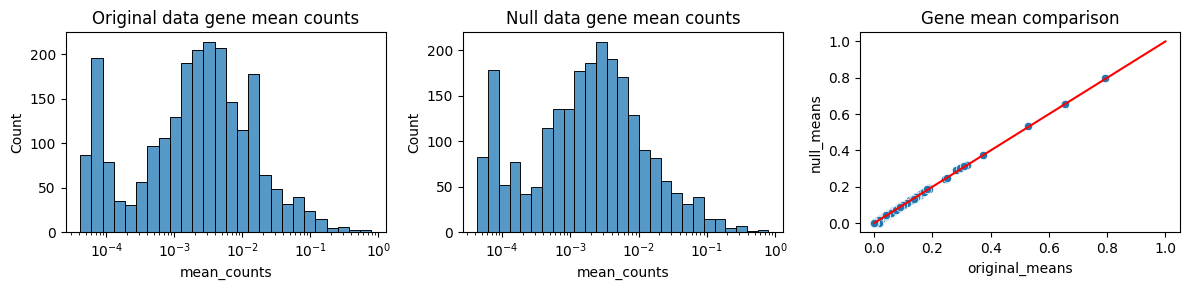

SignificanceResult(statistic=0.9146024344881892, pvalue=0.0)


In [29]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

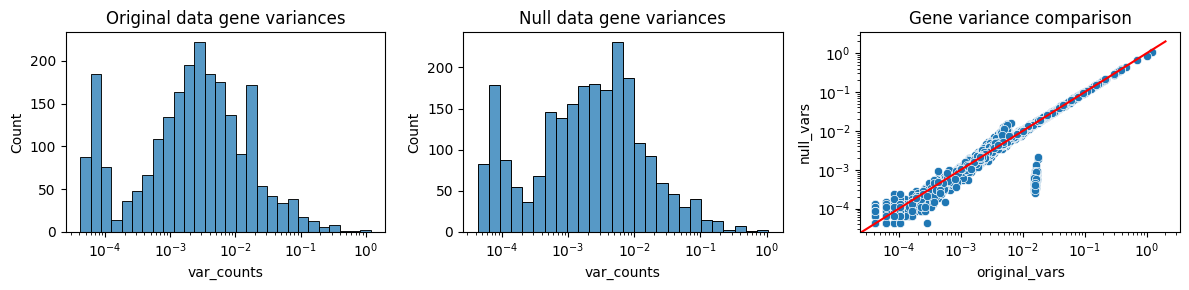

SignificanceResult(statistic=0.9112498228036403, pvalue=0.0)
[[1.        0.9959806]
 [0.9959806 1.       ]]


In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

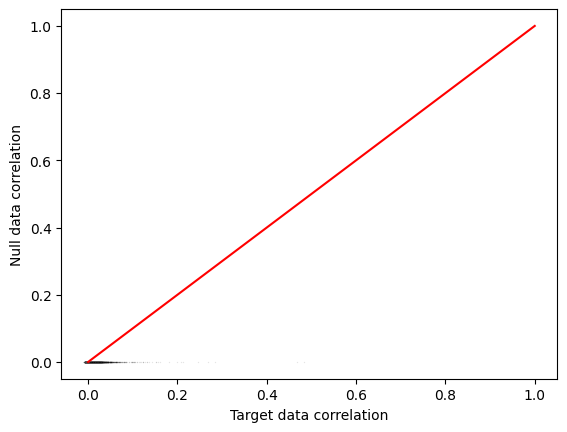

In [31]:
cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_shrink'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1,
                color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_shrink']))], [0, np.ceil(np.max(all_cors_subset['cor_shrink']))],
         color="red")
plt.xlabel("Target data correlation")
plt.ylabel("Null data correlation")

plt.show()

### Process null data

In [32]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [33]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform")
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = data_gene.uns["BacSC_params"]["k_opt"]
n_neighbors_opt = data_gene.uns["BacSC_params"]["n_neighbors_opt"]
min_dist_opt = data_gene.uns["BacSC_params"]["min_dist_opt"]
res_opt = data_gene.uns["BacSC_params"]["res_opt"]
print(n_neighbors_opt)

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


30


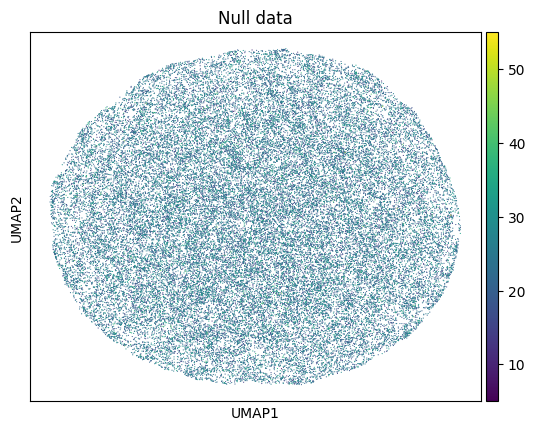

In [8]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [35]:
data_null_gen.var["is_scd_outlier"] = [str(x) for x in data_null_gen.var["is_scd_outlier"]]
data_null_gen.write(data_path + "/null_data_untreated_01.h5ad")

In [7]:
data_null_gen = sc.read_h5ad(data_path + "/null_data_untreated_01.h5ad")
data_gene_nonzero = data_gene_01[:, data_null_gen.var_names].copy()

In [10]:
n_splits = 20
rng = np.random.default_rng(2345)
seeds = rng.choice(1000, n_splits)
null_pvals_dict = {}
min_pvals_null = []
c = 0
res_start = 0.01
res_step = 0.01

for s in seeds:
    res2 = res_start
    twoclust = False
    nclust = 1
    was_greater = False
    max_res_1_cluster = 0
    
    while twoclust is False:
        if nclust < 2:
            if res2 > max_res_1_cluster:
                max_res_1_cluster = res2
            elif max_res_1_cluster > 0: 
                res_step = res_step / 2
            if was_greater:
                res2 += res_step
            else:
                res2 += res_step * 5
        else:
            was_greater = True
            min_res_2plus_clusters = res2
            res2 -= res_step
        res2 = np.round(res2, 5)
        sc.tl.leiden(data_null_gen, resolution=res2, key_added=f"leiden_{c}", random_state=s)
        nclust = len(data_null_gen.obs[f"leiden_{c}"].unique())
        if nclust == 2:
            twoclust = True
        print(f"resolution: {res2}, clusters: {nclust}, step: {res_step}")
            
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] == "0"]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] != "0"]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue
    null_pvals_dict[c] = null_pvals

    clusters = data_gene_01.obs["leiden_opt"].unique()
            
    min_pvals_null.append(np.min(null_pvals))
            
    print(f"split {c+1}/{n_splits} - Resolution {res2}")

    res_start = res2 - 5 * res_step
    c += 1
    
best_split = np.where(min_pvals_null == np.max(min_pvals_null))[0][0]
print(best_split)
print(min_pvals_null[best_split])

/tmp/ipykernel_3629500/3903747148.py:32: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data_null_gen, resolution=res2, key_added=f"leiden_{c}", random_state=s)


resolution: 0.06, clusters: 2, step: 0.01
split 1/20 - Resolution 0.06
resolution: 0.06, clusters: 3, step: 0.01
resolution: 0.05, clusters: 2, step: 0.01
split 2/20 - Resolution 0.05
resolution: 0.05, clusters: 1, step: 0.01
resolution: 0.1, clusters: 4, step: 0.01
resolution: 0.09, clusters: 5, step: 0.01
resolution: 0.08, clusters: 4, step: 0.01
resolution: 0.07, clusters: 3, step: 0.01
resolution: 0.06, clusters: 2, step: 0.01
split 3/20 - Resolution 0.06
resolution: 0.06, clusters: 2, step: 0.01
split 4/20 - Resolution 0.06
resolution: 0.06, clusters: 3, step: 0.01
resolution: 0.05, clusters: 2, step: 0.01
split 5/20 - Resolution 0.05
resolution: 0.05, clusters: 2, step: 0.01
split 6/20 - Resolution 0.05
resolution: 0.05, clusters: 2, step: 0.01
split 7/20 - Resolution 0.05
resolution: 0.05, clusters: 2, step: 0.01
split 8/20 - Resolution 0.05
resolution: 0.05, clusters: 2, step: 0.01
split 9/20 - Resolution 0.05
resolution: 0.05, clusters: 2, step: 0.01
split 10/20 - Resolution 0

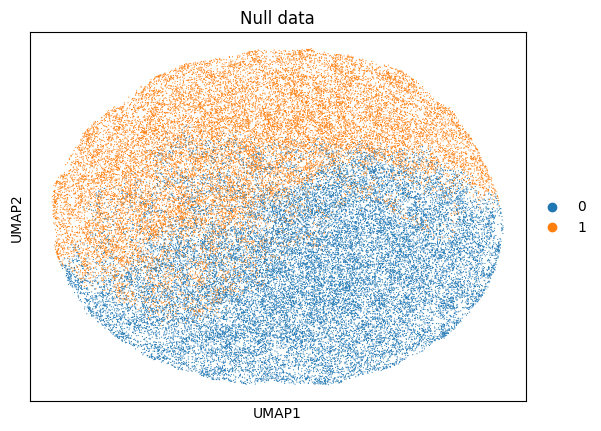

In [11]:
sc.pl.umap(data_null_gen, color=f"leiden_{best_split}", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [12]:
importlib.reload(cd)
clusters = data_gene_01.obs["leiden_opt"].unique()
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    pvals_data = ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue
    p_data = pd.DataFrame({"pval_data": pvals_data}, index=data_gene_nonzero.var.index)
    pval_null_gen = pd.DataFrame({"pval_null": null_pvals_dict[best_split]}, index=data_null_gen.var.index)
    
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

/dss/dsshome1/0A/ra72guj2/BacSC/tools/ClusterDE.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  np.min([(1 / nnull + 1 / nnull * np.sum(contrastScore <= -t)) / np.sum(contrastScore >= t), 1]))


Cluster 0 - DE genes: 0; Minimum q value: 0.9958734525447043
Cluster 1 - DE genes: 0; Minimum q value: 0.9958734525447043


/dss/dsshome1/0A/ra72guj2/BacSC/tools/ClusterDE.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  np.min([(1 / nnull + 1 / nnull * np.sum(contrastScore <= -t)) / np.sum(contrastScore >= t), 1]))


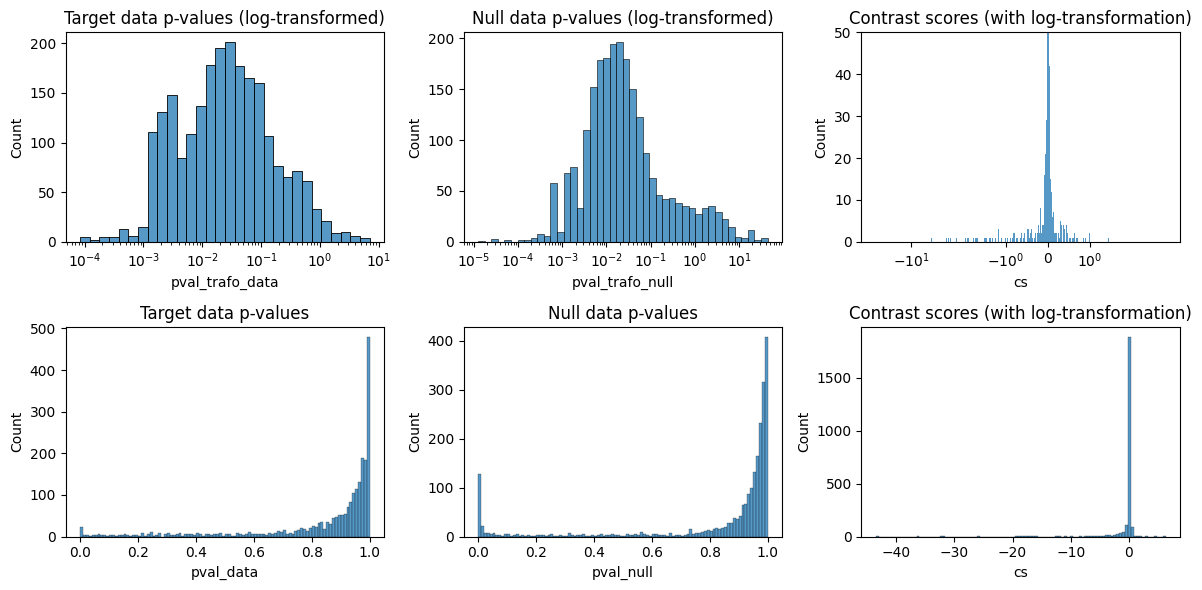

In [13]:
c = "1"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_trafo_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_trafo_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog", ylim=(0, 50))

sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (with log-transformation)")


plt.tight_layout()
plt.show()

In [14]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 0
0.995873     727
1.000000    1583
Name: q, dtype: int64

cluster 1
0.995873     727
1.000000    1583
Name: q, dtype: int64



In [15]:
pvals_log_gen["1"]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
cds-WP_002919759.1,3.931320e-07,8.110866e-01,6.405462,0.090933,6.314529,0.995873
cds-WP_004147333.1,2.944522e-05,7.395536e-01,4.530985,0.131030,4.399955,0.995873
cds-WP_013815099.1-31,6.798779e-04,9.564201e-01,3.167569,0.019351,3.148218,0.995873
cds-WP_032429833.1,2.115751e-04,2.850844e-01,3.674535,0.545027,3.129509,0.995873
cds-WP_001138115.1,2.712900e-03,5.631902e-01,2.566566,0.249345,2.317221,0.995873
...,...,...,...,...,...,...
cds-WP_002919206.1,1.662579e-01,2.991925e-27,0.779218,26.524049,-25.744832,1.000000
cds-WP_004174069.1-2,1.554292e-01,1.887445e-33,0.808467,32.724126,-31.915658,1.000000
cds-WP_002919516.1,8.530992e-04,4.105611e-36,3.069000,35.386622,-32.317622,1.000000
cds-WP_002884146.1,1.003414e-07,8.008110e-44,6.998520,43.096470,-36.097950,1.000000


In [16]:
data_gene_nonzero.uns["ClusterDE_results"] = pvals_log_gen

data_gene_nonzero.uns["ClusterDE_results"]['params'] = {'groupby': 'leiden_opt',
  'reference': 'rest',
  'use_raw': False,
  'layer': None,
}

In [17]:
data_gene_nonzero.write(data_path + "/untreated_data_processed_cluster_01.h5ad")

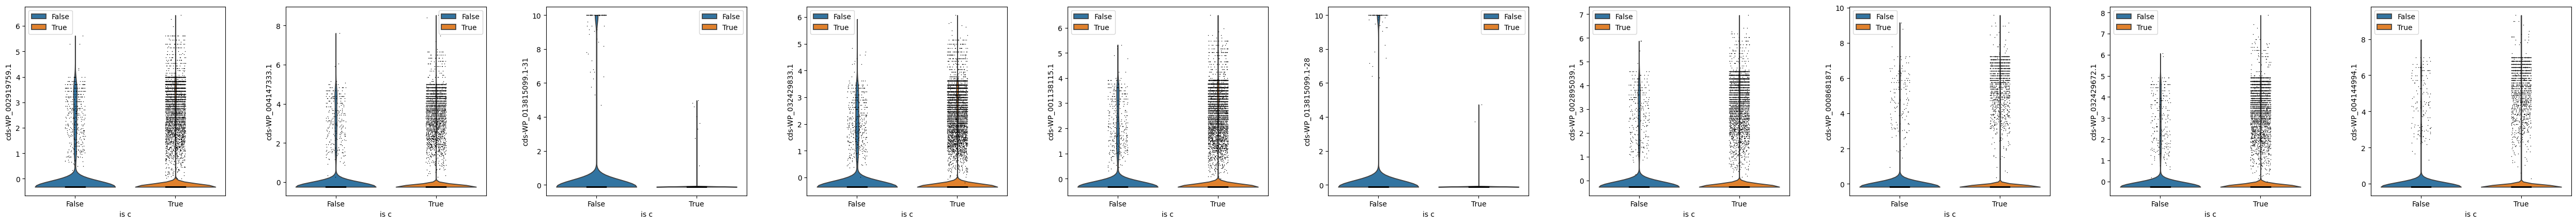

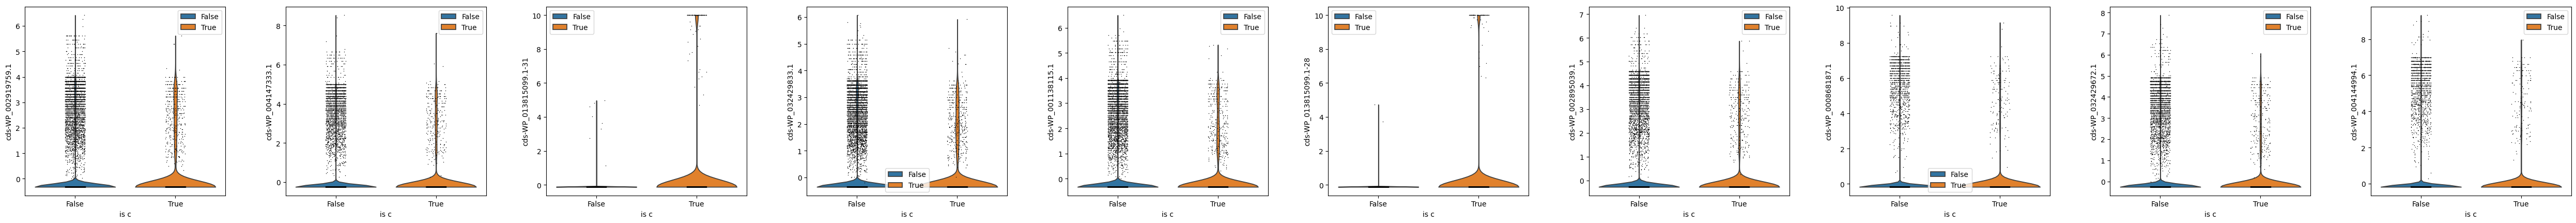

In [18]:
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:10,:].index.tolist()
    data_gene_nonzero.obs["is_c"] = pd.Categorical([x==c for x in data_gene_nonzero.obs["leiden_opt"]])
    with plt.rc_context({"figure.figsize": (5, 5)}):
        sc.pl.violin(data_gene_nonzero, keys=plot_genes, groupby="is_c", multi_panel=True)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


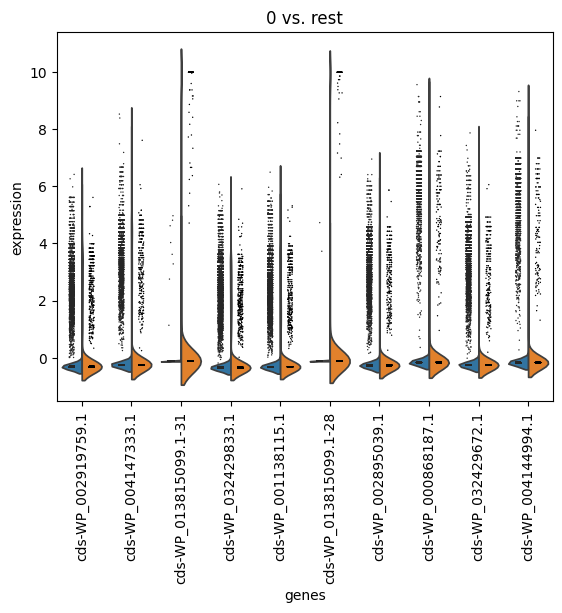

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


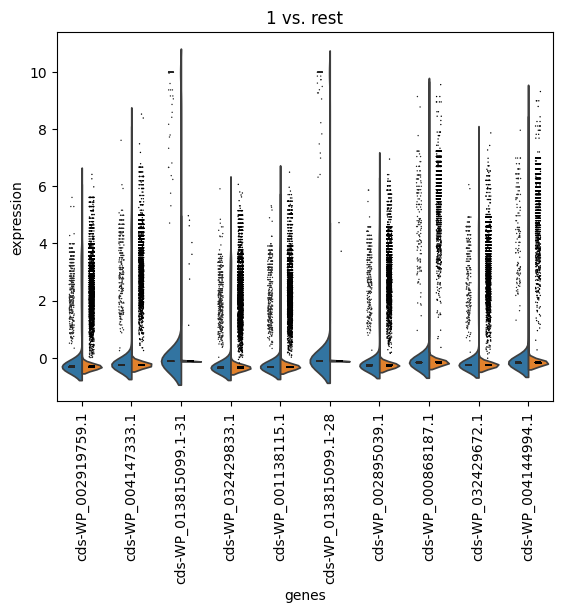

In [19]:
n_genes = 10
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    sc.pl.rank_genes_groups_violin(data_gene_nonzero, gene_names=plot_genes, key="ClusterDE_results", groups=c)

In [20]:
all_marker_genes = []
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    all_marker_genes += plot_genes
    print(f"Cluster {c}")
    print(data_gene_01.var.loc[plot_genes, ["locus_tag", "name", "symbol"]])

Cluster 0
                          locus_tag  \
cds-WP_002919759.1     AF52_RS08415   
cds-WP_004147333.1     AF52_RS14175   
cds-WP_013815099.1-31  AF52_RS22855   
cds-WP_032429833.1     AF52_RS13310   
cds-WP_001138115.1     AF52_RS08430   
cds-WP_013815099.1-28  AF52_RS22855   
cds-WP_002895039.1     AF52_RS12615   
cds-WP_000868187.1     AF52_RS25830   
cds-WP_032429672.1     AF52_RS15745   
cds-WP_004144994.1     AF52_RS10555   

                                                                 name symbol  
cds-WP_002919759.1                          50S ribosomal protein L16   rplP  
cds-WP_004147333.1                                     trigger factor    tig  
cds-WP_013815099.1-31      IS5-like element IS903B family transposase    NaN  
cds-WP_032429833.1          sugar ABC transporter ATP-binding protein    NaN  
cds-WP_001138115.1                          30S ribosomal protein S19   rpsS  
cds-WP_013815099.1-28      IS5-like element IS903B family transposase    NaN  
cds-WP_

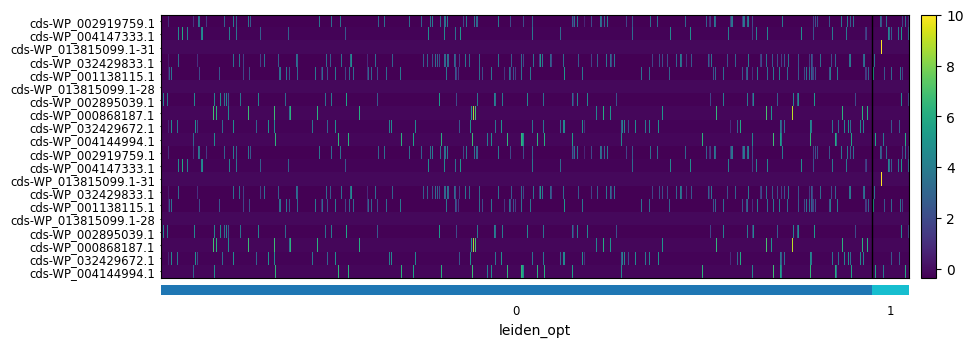

In [21]:
sc.pl.heatmap(data_gene_nonzero, all_marker_genes, groupby='leiden_opt', swap_axes=True)